<a href="https://colab.research.google.com/github/aiaaee/Analyse_Simple_Image/blob/main/Image_Analyzing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import skimage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, segmentation, filters, color
from skimage import graph
from skimage import data, img_as_float
import matplotlib
from skimage import exposure


In [20]:
image = skimage.io.imread('/content/4906111713.tif')

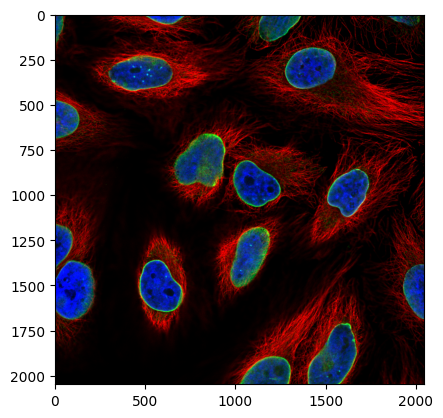

In [21]:
plt.imshow(image,  cmap='gray')

In [22]:
image.shape

(2048, 2048, 3)

# Image Analyzing by different method
in this project we want to test different method to analyze diffrent section of Image.



### Cropping :
Crop array ar by crop_width along each dimension.

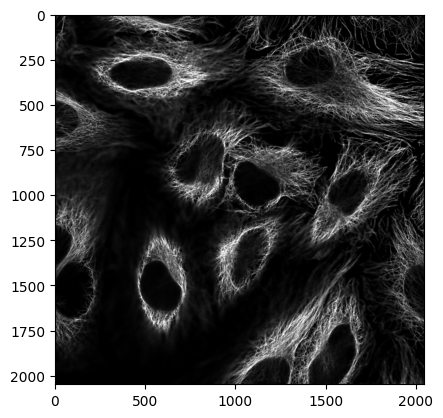

In [23]:
channel0 = image[: , : , 0 ]
plt.imshow(channel0 , cmap='gray')

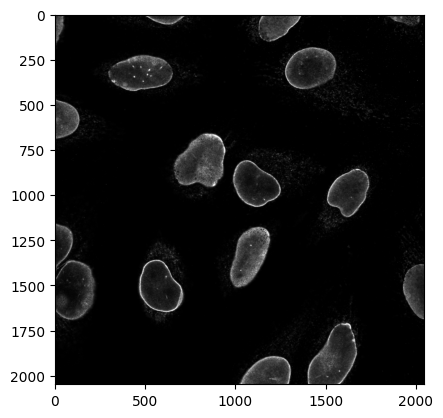

In [24]:
channel1 = image[: , : , 1 ]
plt.imshow(channel1 , cmap='gray')

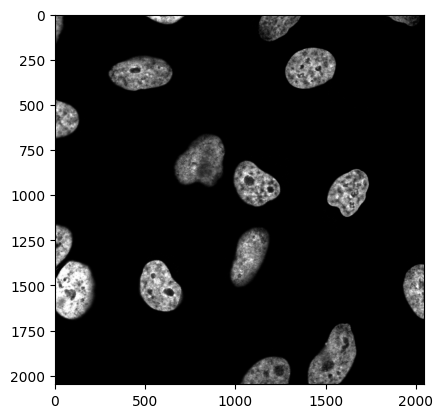

In [25]:
channel1 = image[: , : , 2]
plt.imshow(channel1 , cmap='gray')

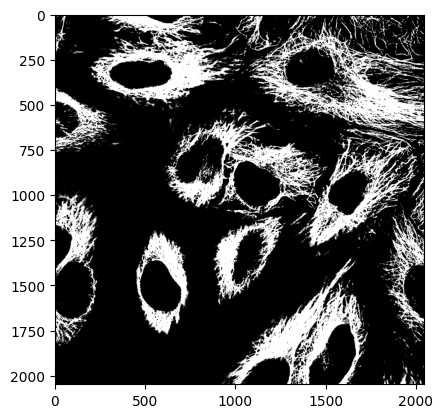

In [26]:
filter_Nuclie = (channel0 > 50 ).astype(int)
plt.imshow(filter_Nuclie , cmap='gray')

(array([[1.233e+03, 4.280e+02, 1.870e+02, ..., 7.000e+00, 2.000e+00,
         0.000e+00],
        [1.218e+03, 4.280e+02, 1.990e+02, ..., 2.000e+00, 0.000e+00,
         0.000e+00],
        [1.223e+03, 4.410e+02, 1.930e+02, ..., 2.000e+00, 1.000e+00,
         0.000e+00],
        ...,
        [1.250e+03, 3.310e+02, 2.150e+02, ..., 6.000e+00, 3.000e+00,
         3.000e+00],
        [1.245e+03, 3.360e+02, 2.140e+02, ..., 7.000e+00, 4.000e+00,
         2.000e+00],
        [1.254e+03, 3.370e+02, 2.170e+02, ..., 7.000e+00, 7.000e+00,
         0.000e+00]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 2048 BarContainer objects>)

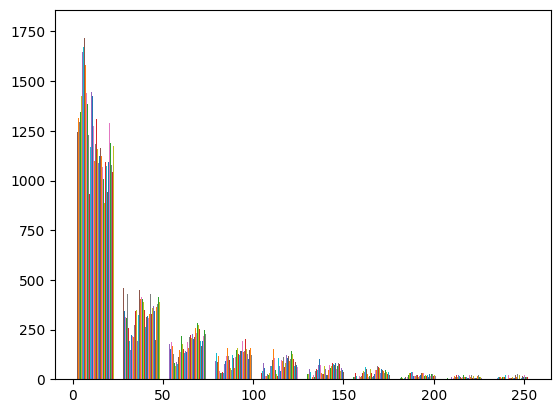

In [27]:
plt.hist(channel0)

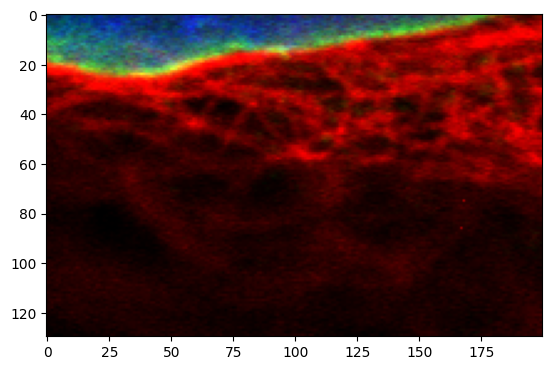

In [28]:
cropped = image[400 : 530 , 400 : 600]
plt.imshow(cropped , cmap='gray')

## Hierarchical Merging of Region Boundary RAGs
demonstrates how to perform hierarchical merging on region boundary Region Adjacency Graphs (RAGs). Region boundary RAGs can be constructed with the `skimage.graph.rag_boundary()` function.

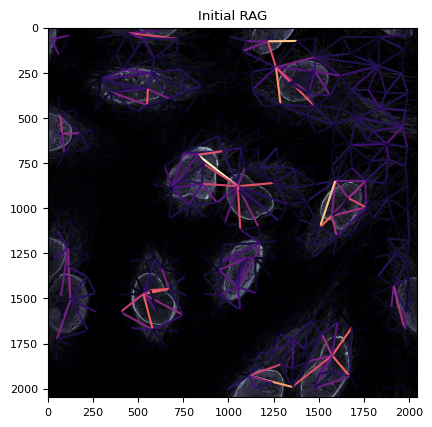

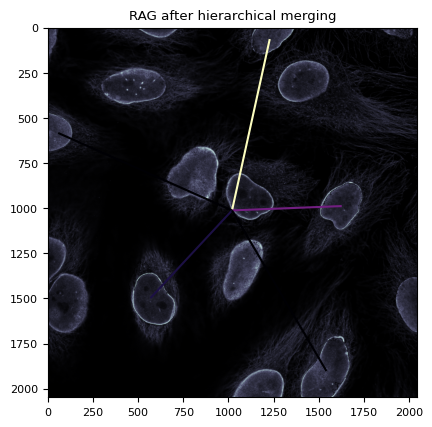

In [38]:
def weight_boundary(graph, src, dst, n):

    default = {'weight': 0.0, 'count': 0}

    count_src = graph[src].get(n, default)['count']
    count_dst = graph[dst].get(n, default)['count']

    weight_src = graph[src].get(n, default)['weight']
    weight_dst = graph[dst].get(n, default)['weight']

    count = count_src + count_dst
    return {
        'count': count,
        'weight': (count_src * weight_src + count_dst * weight_dst) / count,
    }



edges = filters.sobel(color.rgb2gray(image))
labels = segmentation.slic(image, compactness=30, n_segments=400, start_label=1)
g = graph.rag_boundary(labels, edges)

graph.show_rag(labels, g, image)
plt.title('Initial RAG')

labels2 = graph.merge_hierarchical(
    labels,
    g,
    thresh=0.08,
    rag_copy=False,
    in_place_merge=True,
    merge_func=merge_boundary,
    weight_func=weight_boundary,
)

graph.show_rag(labels, g, image)
plt.title('RAG after hierarchical merging')



plt.show()

## Histogram Equalization
 using a method called histogram equalization, which “spreads out the most frequent intensity values” in an image [1]. The equalized image has a roughly linear cumulative distribution function.

/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


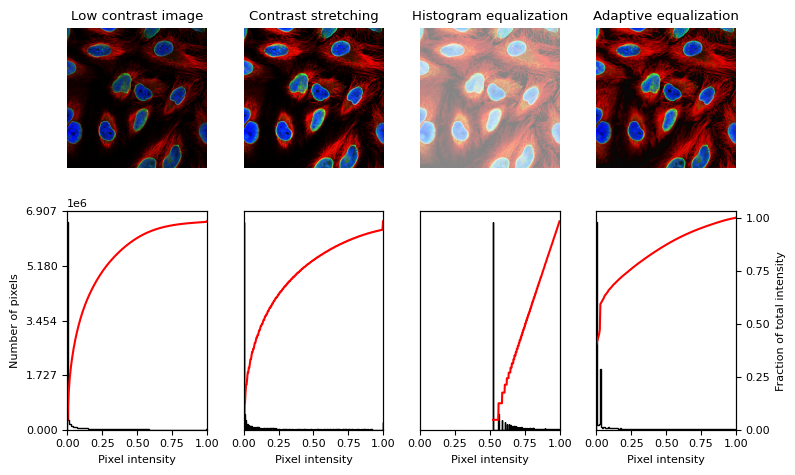

In [40]:


matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram."""
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = skimage.io.imread('/content/4906111713.tif')

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 4), dtype=object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1 + i, sharex=axes[0, 0], sharey=axes[0, 0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5 + i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()